# Risk Assessment and Data-Driven Recommendations for Aircraft Acquisition
## Business Problem

My company wants to diversify its portfolio by expanding into new industries, specifically aviation. They are considering purchasing and operating airplanes for commercial and private enterprises but lack knowledge about the risks. My task is to analyze aviation accident data and determine which aircraft present the lowest risk. These findings will help the head of the new aviation division make informed decisions on which aircraft to purchase.

## The Data

The dataset, provided by the National Transportation Safety Board, contains aviation accident data from 1962 to 2023. It includes records on civil aviation accidents and selected incidents in the United States and international waters.


In [1]:
# Import the pandas library for data manipulation
import pandas as pd

In [2]:
# Loading the CSV file into a DataFrame named df
df = pd.read_csv("AviationData.csv", index_col=0,low_memory=False, encoding='latin1', header=0)
#Printing the first five entries
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#Reset The Index
df.reset_index(inplace=True)

In [4]:
#printing the dataset's shape
df.shape

(88889, 31)

In [5]:
# Display the DataFrame's information to check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From the information above several columns have missing values. For example:
  - `Location` has **52 missing entries**.
  - `Country` has **226 missing entries**.
  - `Latitude` and `Longitude` have many missing values (approximately 54,507 entries).
  - `Airport.Code` and `Airport.Name` additionally showcase a relevant amount of missing values which are 37,757 and 36,185 respectively.

In [6]:
 # Count the total number of rows in the pandas DataFrame df
total_entries = len(df)

# Calculate the percentage of missing values for each column
missing_percentage = (total_entries - df.count()) / total_entries * 100

# Create a DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

print(missing_values_df)

                                        Column  Missing Percentage
Event.Id                              Event.Id            0.000000
Investigation.Type          Investigation.Type            0.000000
Accident.Number                Accident.Number            0.000000
Event.Date                          Event.Date            0.000000
Location                              Location            0.058500
Country                                Country            0.254250
Latitude                              Latitude           61.320298
Longitude                            Longitude           61.330423
Airport.Code                      Airport.Code           43.601570
Airport.Name                      Airport.Name           40.708074
Injury.Severity                Injury.Severity            1.124999
Aircraft.damage                Aircraft.damage            3.593246
Aircraft.Category            Aircraft.Category           63.677170
Registration.Number        Registration.Number            1.55

## Handling Missing Values

In my dataset, I've calculated the percentage of missing values for each column. The following columns exhibit significant missing data:

- **Latitude**: 61.32%
- **Longitude**: 61.33%
- **Aircraft.Category**: 63.68%
- **FAR.Description**: 63.97%
- **Schedule**: 85.85%
- **Air.carrier**: 81.27%

### Reason for Row Dropping

I aim to maintain data integrity and ensure the quality of my analysis. Columns with over 60% missing values present a challenge because:

1. **Insufficient Data**: High percentages of missing data can lead to unreliable conclusions, as the remaining data may not be representative of the whole dataset.

2. **Data Quality**: Keeping rows with excessive missing data can compromise the overall quality of my dataset. Removing these rows helps maintain a cleaner and more reliable dataset for further analysis.

Therefore, I will drop rows where any column has missing values exceeding 60% to enhance the quality of my dataset and the accuracy of my analysis.


In [7]:
# Remove columns that have over 60% missing values
threshold = 60
columns_to_remove = missing_values_df[missing_values_df['Missing Percentage'] > threshold]['Column']
df = df.drop(columns=columns_to_remove.tolist())

#print the first five entries to confirm
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the above, the number of columns left are 24 from the privious ones which were 30 columns 

# Further cleaning

I have decided to drop the following columns due to their significant percentages of missing data:

- **Airport.Code**: 43.60% missing values
- **Airport.Name**: 40.71% missing values

### Reasons for Dropping These Columns

1. **Central Tendencies**: Measures of central tendency cannot appropriately replace the missing values in these columns. Airport codes and Airport names are categorical variables, and using central tendencies would not provide meaningful replacements. Therefore, adding these columns to the dataset would not be helpful.

2. **Data Quality**:Maintaining columns with a significant number of missing values may have a negative impact on my dataset's overall quality. To ensure proper analysis, it is necessary to work with data that is complete

In [8]:
# Dropping the Airport code column and the Airport Name.
df = df.drop(columns=['Airport.Code', 'Airport.Name'])

#printing the first five entries to confirm
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,N3906K,North American,...,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [9]:
#Print the shape of our current dataframe
df.shape

(88889, 23)

In [10]:
# Display my current DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

## Handling missing values for the Categorical Data

In this analysis, I've opted to replace missing values in categorical data with the mode. This is because:

1. **Efficiency**: Mode imputation is a simple and effective computing technique, particularly when dealing with large datasets.

2. **Preserving Data Distribution**: Using the mode, the original distribution of the categorical variable is preserved, ensuring the accuracy of the data.

3. **Minimal Data Loss**: By filling in missing values with the most common category, we minimize the loss of information.

4. **Common Practice**: This method is a widely accepted and effective approach in data analysis and machine learning.


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with their mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Display my current DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Registration.Number     88889 non-null  object 
 9   Make                    88889 non-null  object 
 10  Model                   88889 non-null  object 
 11  Amateur.Built           88889 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             88889 non-null  object 
 14  Purpose.of.flight       88889 non-null

## Checking for the percentage of Missing data In my current DataFrame

In [12]:
 # Count the total number of rows in the pandas DataFrame df
total_entries = len(df)

# Calculate the percentage of missing values for each column
missing_percentage = (total_entries - df.count()) / total_entries * 100

# Create a DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

print(missing_values_df)

                                        Column  Missing Percentage
Event.Id                              Event.Id            0.000000
Investigation.Type          Investigation.Type            0.000000
Accident.Number                Accident.Number            0.000000
Event.Date                          Event.Date            0.000000
Location                              Location            0.000000
Country                                Country            0.000000
Injury.Severity                Injury.Severity            0.000000
Aircraft.damage                Aircraft.damage            0.000000
Registration.Number        Registration.Number            0.000000
Make                                      Make            0.000000
Model                                    Model            0.000000
Amateur.Built                    Amateur.Built            0.000000
Number.of.Engines            Number.of.Engines            6.844491
Engine.Type                        Engine.Type            0.00

# Handling Missing Data for the Numerical Data
### 1. **Number.of.Engines**
- **Handling Method**: **Mean Imputation**
  - Given that this is a numerical column, I will use the mean of the current values to fill in the blanks. This method is appropriate because it provides an important principle that accurately summarizes the data without introducing bias.

In [13]:
# Mean imputation for Number.of.Engines
mean_engines = df['Number.of.Engines'].mean()
df['Number.of.Engines'].fillna(mean_engines, inplace=True)

### 2. **Total.Fatal.Injuries**
- **Handling Method**: **Mean Imputation**
  - Similar to the previous column, I will calculate the mean for this numerical data and replace the missing values with the computed mean. This approach is justified given the relatively low percentage of missing data.

In [14]:
# Mean imputation for Total.Fatal.Injuries
mean_fatal_injuries = df['Total.Fatal.Injuries'].mean()
df['Total.Fatal.Injuries'].fillna(mean_fatal_injuries, inplace=True)

### 3. **Total.Serious.Injuries**
- **Handling Method**: **Mean Imputation**
  - I will also use mean imputation for this column. Although the percentage of missing data is slightly higher, mean imputation remains valid as long as the data is approximately normally distributed.

In [15]:
# Mean imputation for Total.Serious.Injuries
mean_serious_injuries = df['Total.Serious.Injuries'].mean()
df['Total.Serious.Injuries'].fillna(mean_serious_injuries, inplace=True)

### 4. **Total.Minor.Injuries**
- **Handling Method**: **Mean Imputation**
  - I will use the available data to compute the mean value for this column and then fill in the blanks. This helps the dataset's consistency without adding to its complexity.

In [16]:
# Mean imputation for Total.Minor.Injuries
mean_minor_injuries = df['Total.Minor.Injuries'].mean()
df['Total.Minor.Injuries'].fillna(mean_minor_injuries, inplace=True)

### 5. **Total.Uninjured**
- **Handling Method**: **Mean Imputation**
  - I will apply mean imputation to replace the missing values in this column as well. Given that it has the lowest percentage of missing values, this approach is consistent with the handling of other injury-related columns.


In [17]:
# Mean imputation for Total.Uninjured
mean_uninjured = df['Total.Uninjured'].mean()
df['Total.Uninjured'].fillna(mean_uninjured, inplace=True)

In [18]:
#Display my current DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Registration.Number     88889 non-null  object 
 9   Make                    88889 non-null  object 
 10  Model                   88889 non-null  object 
 11  Amateur.Built           88889 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             88889 non-null  object 
 14  Purpose.of.flight       88889 non-null

In [19]:
#Printing the first 10 values in the DataFrame
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.000000,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.000000,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.000000,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.000000,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Reciprocating,Personal,1.000000,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Personal,0.647855,0.279881,1.000000,44.00000,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,Reciprocating,Personal,4.000000,0.000000,0.000000,0.00000,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,Reciprocating,Personal,0.000000,0.000000,0.000000,2.00000,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,...,Reciprocating,Business,0.000000,0.000000,0.000000,2.00000,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,N3906K,North American,...,Reciprocating,Personal,0.000000,0.000000,3.000000,0.00000,IMC,Cruise,Probable Cause,01-01-1982


From the above, we can colude that the data is now clean

# Cleaning The Remaining Columns

In [20]:
# Replace 'Fatal(x)' with 'Fatal' while keeping 'Non-Fatal' unchanged since the total number of deaths has been indicated in the column Total.Fatal.Injuries
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

In [21]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.000000,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.000000,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.000000,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.000000,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,N15NY,Cessna,...,Reciprocating,Personal,1.000000,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Personal,0.647855,0.279881,1.000000,44.00000,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,N4988E,Cessna,...,Reciprocating,Personal,4.000000,0.000000,0.000000,0.00000,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,Reciprocating,Personal,0.000000,0.000000,0.000000,2.00000,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,...,Reciprocating,Business,0.000000,0.000000,0.000000,2.00000,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,N3906K,North American,...,Reciprocating,Personal,0.000000,0.000000,3.000000,0.00000,IMC,Cruise,Probable Cause,01-01-1982


In [22]:
# Changing the Make column to use .title() so as to have uniform entries
df['Make'] = df['Make'].str.title()

#remove any unwanted spaces 
df.loc[:, 'Make'] = df['Make'].str.strip()

# Displaying the last 20 entries to confirm
df.tail(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,C-GZPU,Piper,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,14-12-2022
88870,20221215106461,Accident,ERA23LA089,2022-12-13,"Rockingham, NC",United States,Non-Fatal,Substantial,N498DS,Piper,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,20-12-2022
88871,20221220106480,Accident,WPR23LA072,2022-12-13,"Liberal, KS",United States,Non-Fatal,Substantial,N253SB,Cessna,...,Reciprocating,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,20-12-2022
88872,20221214106459,Accident,GAA23WA042,2022-12-14,"Happy Valley-Goose Bay, OF",Canada,Serious,Substantial,N5EQ,Piper,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Landing,Probable Cause,20-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,N416PC,Cirrus Design Corp,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022
88874,20221215106462,Accident,CEN23LA064,2022-12-15,"Patterson, LA",United States,Non-Fatal,Substantial,N414RL,Bell,...,Reciprocating,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,25-09-2020
88875,20221219106474,Accident,ANC23LA009,2022-12-15,"Lihue, HI",United States,Serious,Substantial,N991AB,Beech,...,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,Landing,Probable Cause,22-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,N398KL,Swearingen,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,N5405V,Cessna,...,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,23-12-2022
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"Cottonwood, CA",United States,Minor,Substantial,N9YA,Royse Ralph L,...,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,27-12-2022


# Visualizing the Data

In [23]:
#Importing Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Print the remaining columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

## A Plot of Accident Count by Broad Phase of Flight

I created this plot to show how many accidents happen in different phases of flight, like takeoff, cruising, and landing. By grouping the data by 'Broad.phase.of.flight', I want to see which phases have more accidents. The bar chart will help me compare the accident counts for each phase and understand where safety improvements might be needed.


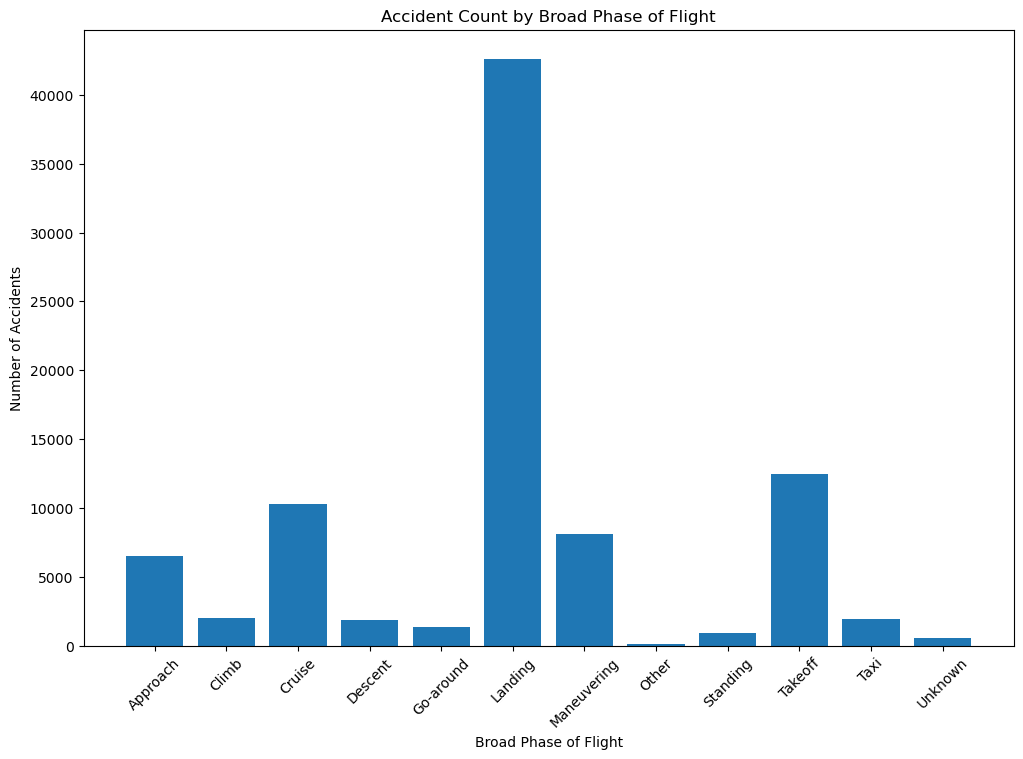

In [25]:
# Group the DataFrame by the 'Broad.phase.of.flight' column and count the occurrences of each phase
grouped_data = df.groupby('Broad.phase.of.flight').count()

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar chart
plt.bar(x=grouped_data.index, height=grouped_data['Event.Id'])

# Set the title of the plot
plt.title('Accident Count by Broad Phase of Flight')

# Set the label for the x-axis
plt.xlabel('Broad Phase of Flight')

# Set the label for the y-axis
plt.ylabel('Number of Accidents')

# Rotate x-axis labels for one to read easily
plt.xticks(rotation=45)

# Display the plot
plt.show();

### Observation
 From the above we can conclude that most of the accidets occur when landing

## Check the distribution of data using Value_counts()

In [26]:
# Number of incidents per make
Number_of_Makes = df['Make'].value_counts()
Number_of_Makes

Make
Cessna           27212
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

## Aircraft Count Data Interpretation

- **Cessna** leads with **27,212** incidents, reflecting its popularity in general aviation.
- **Piper** follows with **14,870** incidents, also common among pilots.
- **Beech** has **5,372** incidents, while **Boeing** reports **2,745**, indicating fewer incidents for larger commercial aircraft.
- **Bell** shows **2,722** incidents, representing helicopter data.
- Rare names like **Cohen** and **Kitchens** have only **1 incident**, highlighting less common aircraft.

The data shows that general aviation aircraft dominate incident reports, with Cessna and Piper being the most frequent.

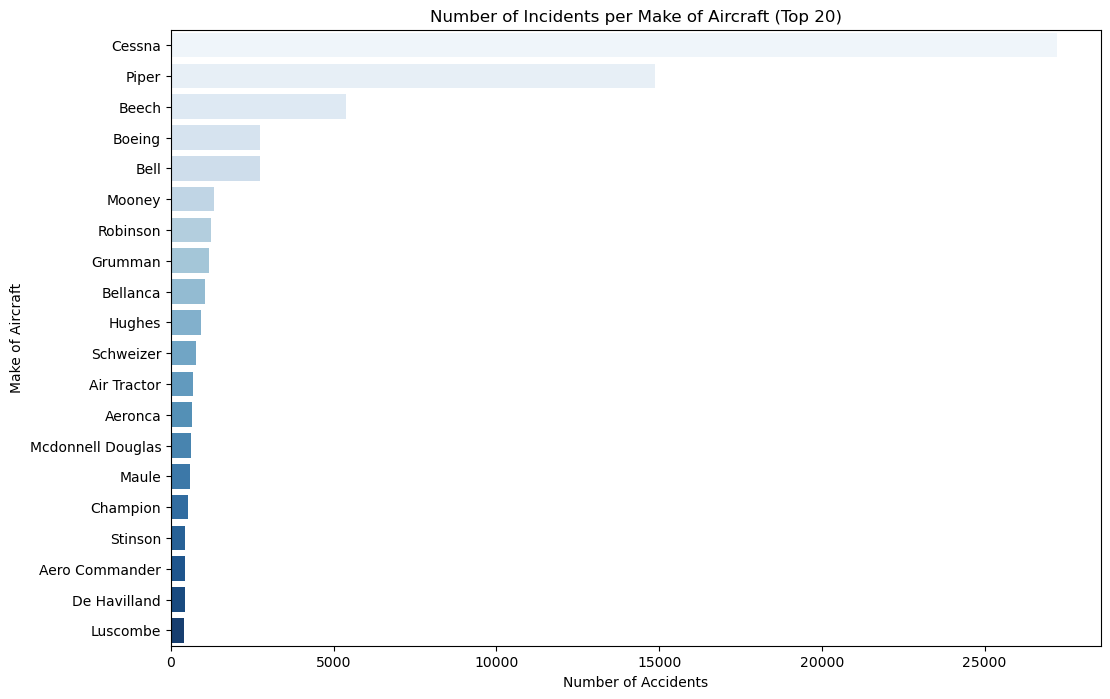

In [27]:
# Plot the bar plot for the top makes
plt.figure(figsize=(12, 8))
# Use only top 20 makes
sns.barplot(x=Number_of_Makes.values[:20], y=Number_of_Makes.index[:20], palette='Blues')
#Plot title
plt.title('Number of Incidents per Make of Aircraft (Top 20)')
#Label x axis
plt.xlabel('Number of Accidents')
#Label Y axis
plt.ylabel('Make of Aircraft')
#Display Plot
plt.show()

In [28]:
# Checking for columns containing numerical data
Numerical_data = df.select_dtypes(include=['float64']).columns
Numerical_data

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')

In [29]:
# Print the columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

## Scatter Plot to view the Correlation Between Number of Engines and Number of Accidents

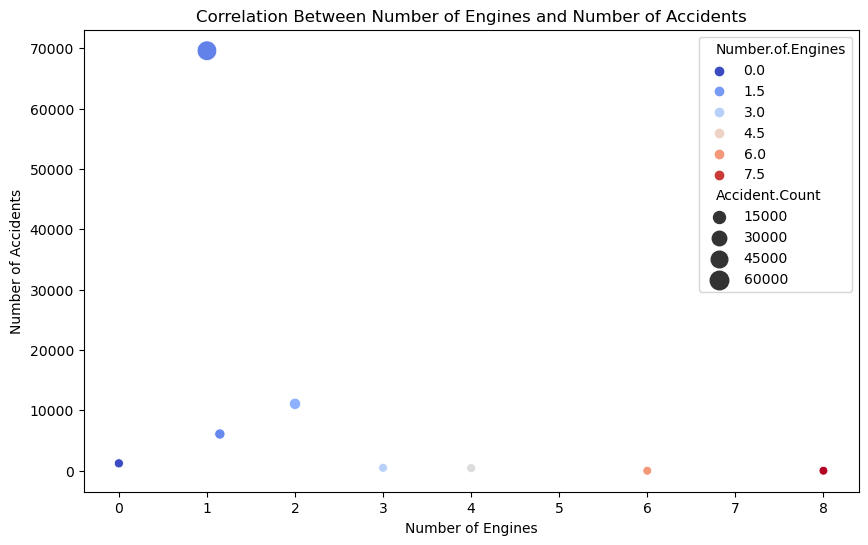

In [30]:
# Group data by the 'Number.of.Engines' and count the number of accidents
engines_accidents = df.groupby('Number.of.Engines').size().reset_index(name='Accident.Count')

# Plotting the scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number.of.Engines', y='Accident.Count', data=engines_accidents, hue='Number.of.Engines', palette='coolwarm', size='Accident.Count', sizes=(40, 200))

# Adding titles and labels
plt.title('Correlation Between Number of Engines and Number of Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')

#Displaying the plot
plt.show()

### Observation
Accident counts decrease as the number of engines increases, which could be due to the fact that larger aircraft with more engines have more safety measures and are used in more controlled conditions.

In [31]:
Make_count = df['Make'].value_counts()
Make_count

Make
Cessna           27212
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [32]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    67342
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

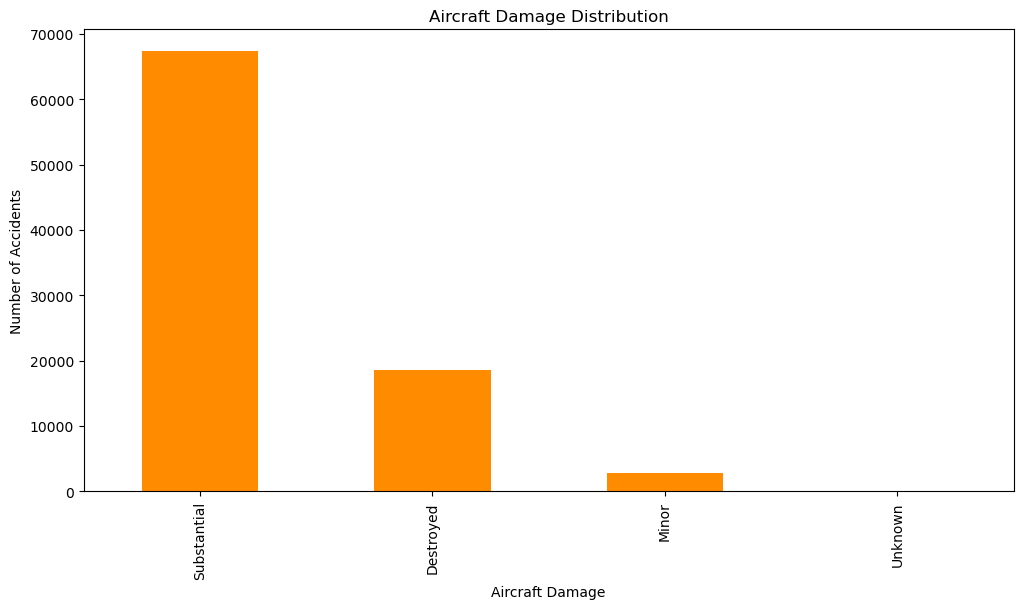

In [33]:
# Count the occurrences in 'Make' and 'Aircraft.damage'
make_value_counts = df['Make'].value_counts()
aircraft_damage_counts = df['Aircraft.damage'].value_counts()

# Plotting the two sets of data
plt.figure(figsize=(12, 6))
aircraft_damage_counts.plot(kind='bar', color='darkorange')

# labelling the title and the axes
plt.title('Aircraft Damage Distribution')
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Damage')

# Display The plot
plt.show()

## Visualizing the Top 20 and Bottom 20 Planes Based on Frequency in df['Make'] and Their Injury Severity (df['Injury.Severity'])
By observing which aircraft models have the highest or lowest frequency of accidents or incidents with various levels of injury severity, we can assess potential safety trends.
For example, certain makes may be associated with higher rates of severe injuries or fatalities, providing insights into their safety performance.

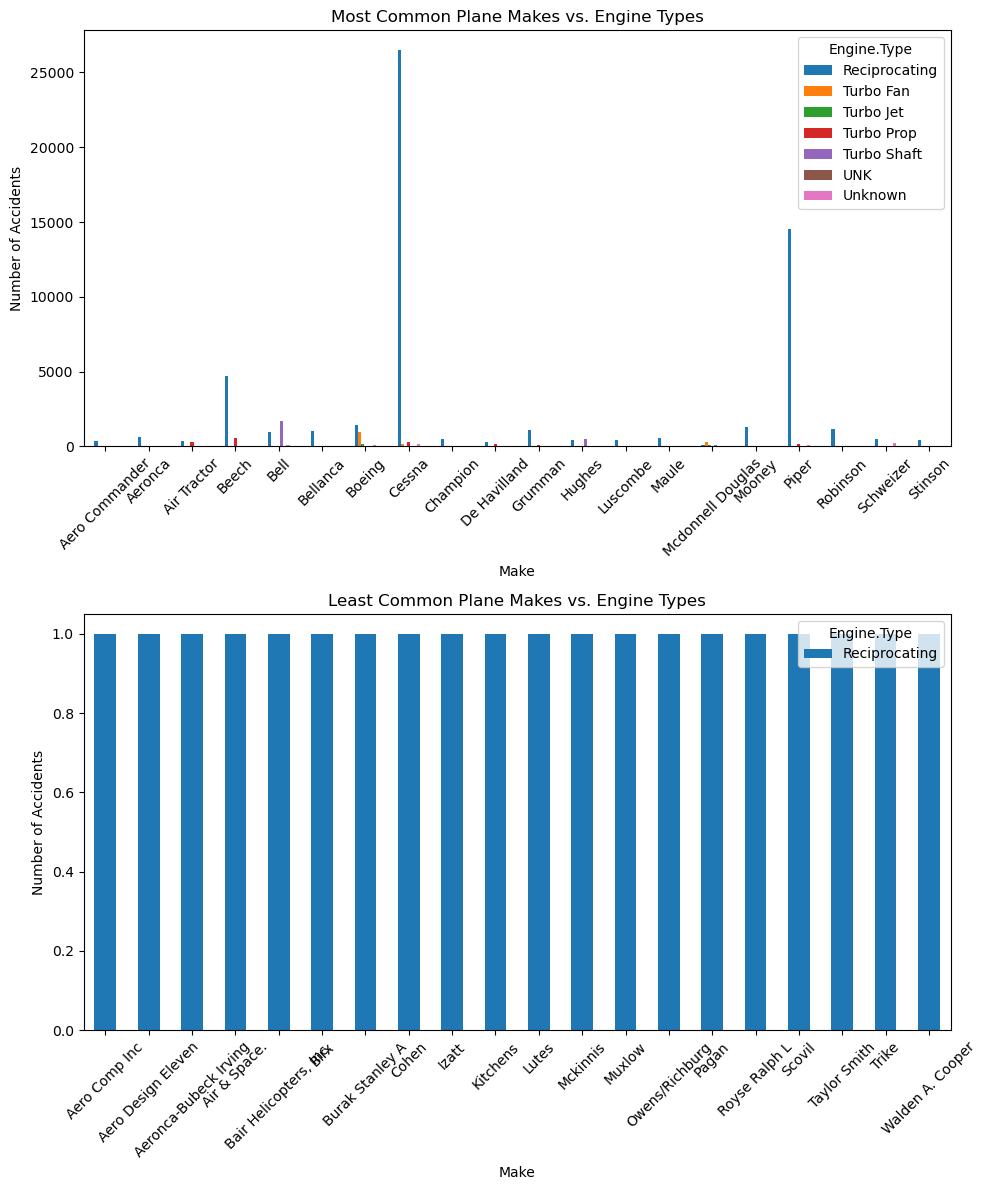

In [34]:
# Counting the occurrences of each plane make and their engine type
make_engine_counts = df.groupby(['Make', 'Engine.Type']).size().reset_index(name='Count')

# 20 most common makes
most_common_makes = df['Make'].value_counts().head(20).index

# 20 least common makes
least_common_makes = df['Make'].value_counts().tail(20).index

# Filter DataFrame for most makes
most_common_df = make_engine_counts[make_engine_counts['Make'].isin(most_common_makes)]

# Filter DataFrame for Least makes
least_common_df = make_engine_counts[make_engine_counts['Make'].isin(least_common_makes)]

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Ploting for Most Common Makes against Engine Types
most_common_df.pivot(index='Make', columns='Engine.Type', values='Count').fillna(0).plot(kind='bar', ax=axes[0])
axes[0].set_title('Most Common Plane Makes vs. Engine Types')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Ploting for Least Common Makes against Engine Types
least_common_df.pivot(index='Make', columns='Engine.Type', values='Count').fillna(0).plot(kind='bar', ax=axes[1])
axes[1].set_title('Least Common Plane Makes vs. Engine Types')
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Number of Accidents')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Observation
- **Cessna** and **Piper** are highly represented in the data set with most non-fatal incidents.
- For the least frequent planes, most incidents are reported as **minor injuries**.
- **Fatalities** are more prominent in frequently used aircraft, but **minor injuries** dominate in less common aircraft.


# Visualizing the Top 20 and Bottom 20 Plane Models and The number of accidents they have been involved in.
This will help in classifying which plane models are riskier.

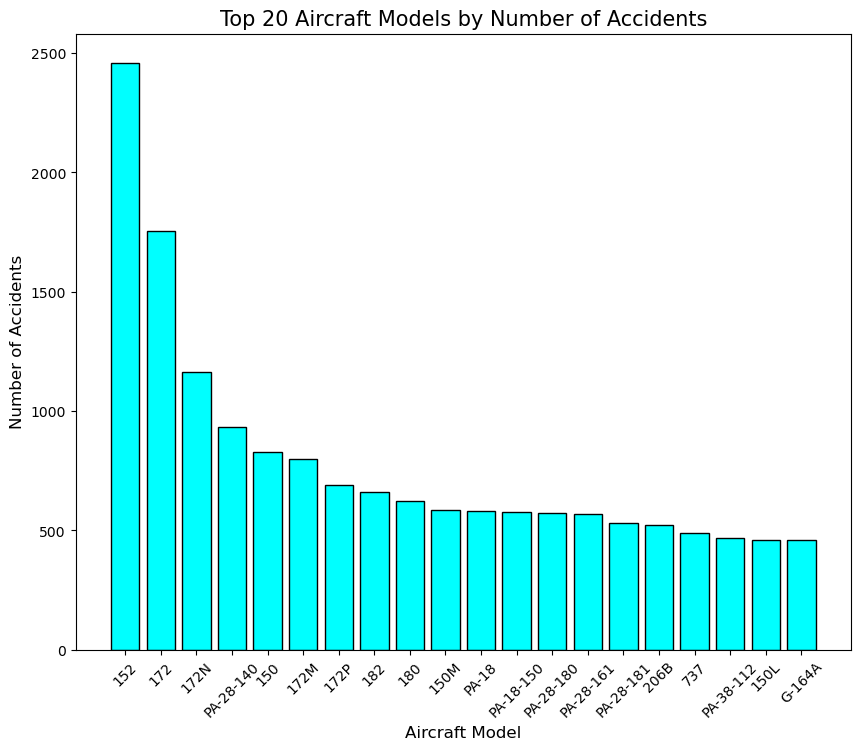

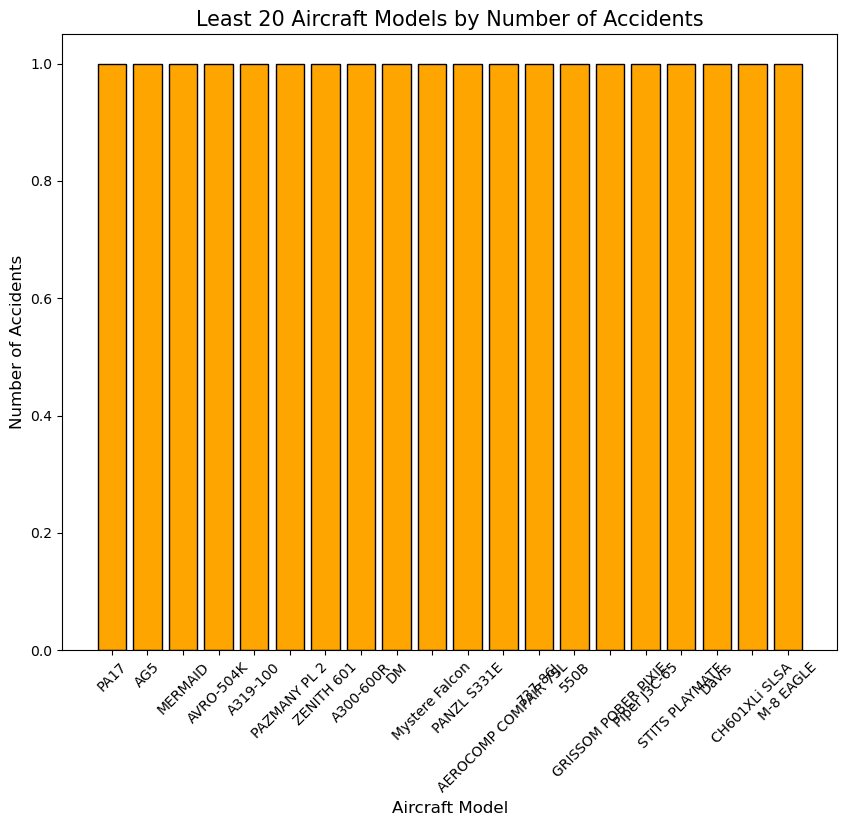

In [35]:
# Counting the number of accidents based on the Aircraft Model
model_counts = df['Model'].value_counts().sort_values(ascending=False)

# Selecting the top 20 models
top_20_models = model_counts.head(20)
#selcting the bottom 20 models
bottom_20_models = model_counts.tail(20)

# Creating a bar graph for the top 20 models
plt.figure(figsize=(10, 8))
plt.bar(top_20_models.index, top_20_models.values, color='Aqua', edgecolor='black')

#labelling the title and axes
plt.title('Top 20 Aircraft Models by Number of Accidents', fontsize=15)
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for one to read better
plt.xticks(rotation=45)  
# Displayng the plot
plt.show()

# Creating a bar graph for the top 20 models
plt.figure(figsize=(10, 8))
plt.bar(bottom_20_models.index, bottom_20_models.values, color='orange', edgecolor='black')

#labelling the title and axes
plt.title('Least 20 Aircraft Models by Number of Accidents', fontsize=15)
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for one to read better
plt.xticks(rotation=45)

# Displayng the plot
plt.show()


## Observation
Model 152, 172 and 172N have relatively very high incidents hence I can term them as riskier.

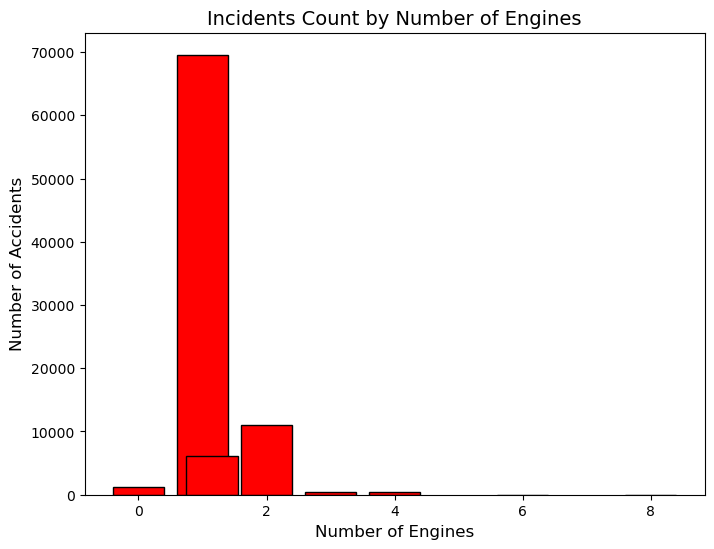

In [36]:
# counting the number of incidents based on the engine count
engine_incident_counts = df['Number.of.Engines'].value_counts().sort_index()

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(engine_incident_counts.index, engine_incident_counts.values, color='red', edgecolor='black')

# Adding titles and axis labels
plt.title('Incidents Count by Number of Engines', fontsize=14)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Displaying the plot
plt.show()

### OBSERVATION
The chart shows that planes with one engine are involved in more accidents than those with more engines. The bar for single-engine planes is the tallest, meaning they have the highest number of incidents. This could be because there are many single-engine planes, and if the engine fails, there are no backups. Although planes with two or more engines are also involved in accidents, single-engine planes seem to have the most accidents based on this data.

### Line graph to view the trend of accidents over time

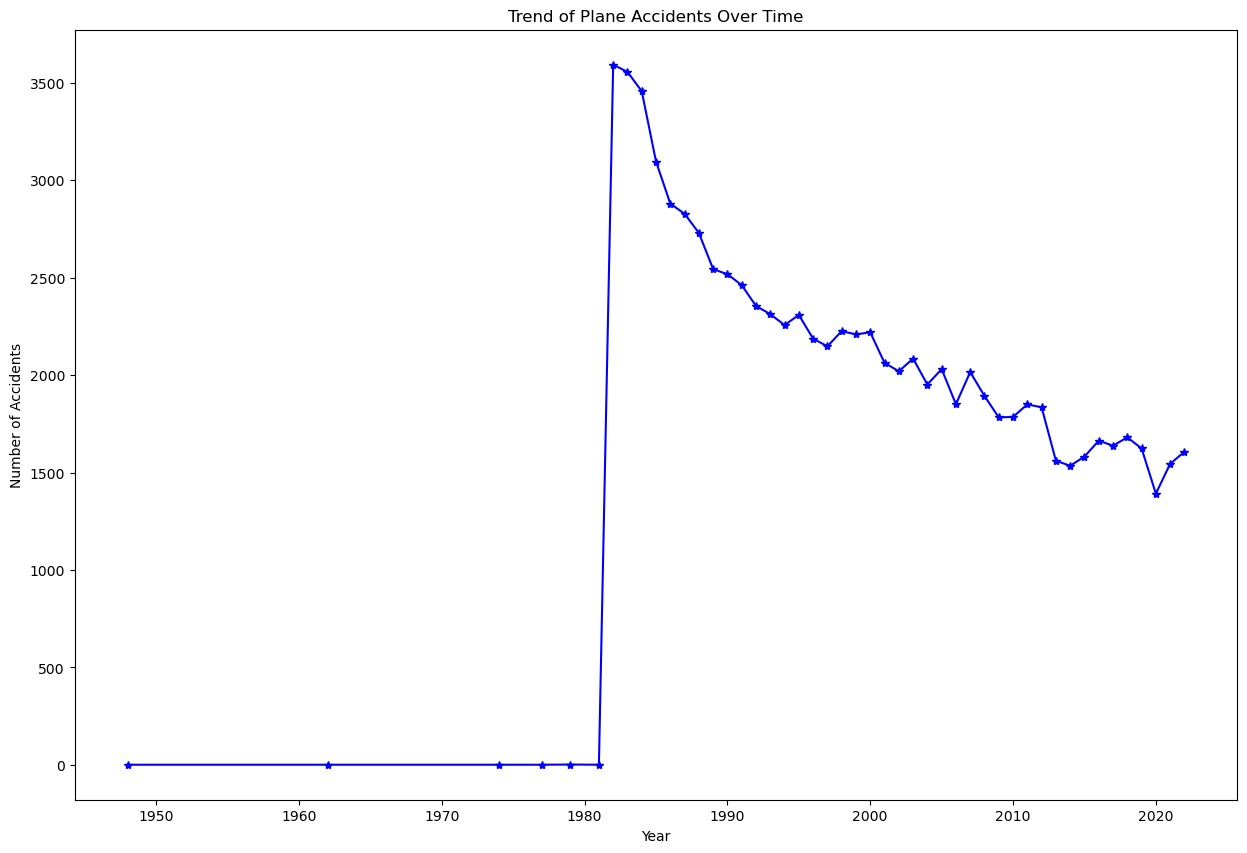

In [37]:
# Convert date column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Grouping the data by year and counting the number of accidents in each year
accidents_per_year = df['Event.Date'].dt.year.value_counts().sort_index()

# Creating a line plot
plt.figure(figsize=(15,10))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='*', color='Blue', linestyle='-')

# Add titles and labels
plt.title('Trend of Plane Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Display the plot
plt.show()

### Observation
From the graph above, I can conclude that plane accidents have been reducing over the last Forty years despite us knowing that there has been a significant increase in the number of flights

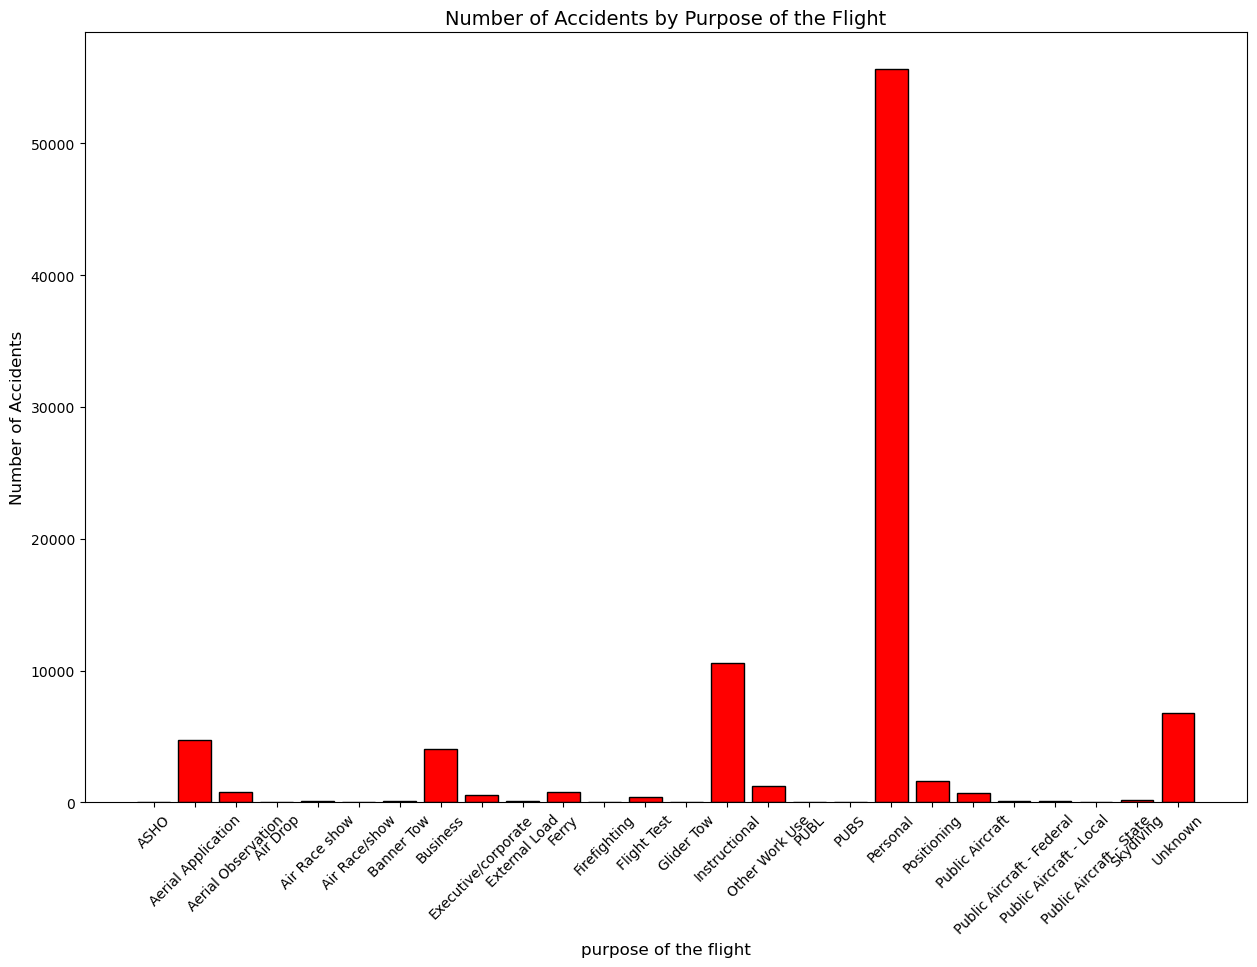

In [38]:
# counting the number of incidents based on the purpose of the flight
Purpose_of_flight_counts = df['Purpose.of.flight'].value_counts().sort_index()

# Creating the bar chart
plt.figure(figsize=(15, 10))
plt.bar(Purpose_of_flight_counts.index, Purpose_of_flight_counts.values, color='red', edgecolor='black')

# Adding titles and axis labels
plt.title('Number of Accidents by Purpose of the Flight', fontsize=14)
plt.xlabel('purpose of the flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotating x-axis labels by 45 degrees to enhance readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

### Observation 
The bar graph shows the number of accidents based on the purpose of the flight. "Personal" flights have by far the highest number of incidents, with a significantly taller bar compared to all other categories. Other flight purposes, such as instructional, business, and aerial application, also have some accidents but at much lower rates. A few categories, like "Unknown" and "Public Aircraft," have fewer incidents. This suggests that personal flights are involved in the most accidents compared to other types of flights.

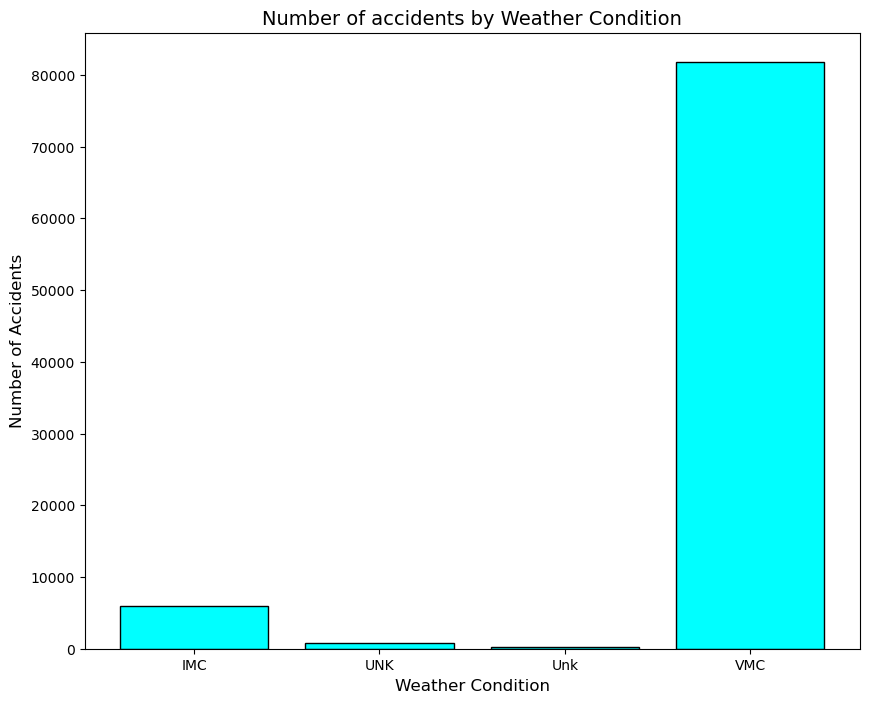

In [39]:
# counting the number of incidents based on the Weather Condition
Weather_Condition_counts = df['Weather.Condition'].value_counts().sort_index()

# Creating the bar chart
plt.figure(figsize=(10, 8))
plt.bar(Weather_Condition_counts.index, Weather_Condition_counts.values, color='Aqua', edgecolor='black')

# Adding titles and axis labels
plt.title('Number of accidents by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Displaying the plot
plt.show()

### Observation.
Many accidents tend to happen in Visual Metrological Conditions ( *VMC*) where the pilots are advised to fly by sight compared to the Instrumental Metrological Conditions (*IMS*) where the pilots are required to use the instruments due to limited visibility. Both (*UNK*) and (*unk*) represents **unknown data**.

In [40]:
# Saving a copy of the cleaned Data
df.to_csv('cleaned_AviationData.csv', index=False)

# CONCLUSION

# Risk Assessment and Data-Driven Recommendations for Aircraft Acquisition

## Understanding the Risks

From my analysis, I have come up with the following observations:

1. **Aircraft Make**: Some aircraft models have higher accident rates with Cessna, Piper, and Beech being on top each with over 5000 cases.
2. **Number of Engines**: Single-engine aircraft are riskier than those with multiple engines. This might be caused by a lack of a backup in case of an engine failure which is something common with aircraft.
3. **Engine Type**: Aircraft with reciprocating engines have recorded more accidents and can be considered riskier.
4. **Purpose of Flight**: Personal and business flights often have higher accident rates. This might be caused by the fact that most of them have single engines.
5. **Weather Conditions**: Flying in clear weather *(Visual Metrological Conditions(VMC))* can still have risks.

## Proposed Guides for Buying an Aircraft

1. **Choose Multi-Engine Aircraft**: Buy planes with two or more engines to lower the risk of engine failure and in case of an engine failure there can be a backup.
2. **Consider Turbo Jet Engines**: Jet engines may cost more but usually have fewer accidents than reciprocating engines.
3. **Avoid High-Risk Models**: From the analysis, some aircraft models tend to pose more risk with Model 152, 172 and 172N having relatively very high incidents hence I can term them as riskier.
4. **Focusing on Commercial and Cargo Flights**: These types of operations generally have fewer accidents compared to personal or business flights.
5. **Monitor Weather**: The company can invest more in weather monitoring tools as well as improving the pilots' skills since from the analysis where I was comparing the weather conditions and their relative number of accidents, I noted that many accidents occurred in the *(Visual Metrological Conditions(VMC))* where the pilots are advised to fly by sight compared to *(Instrumental Metrological Conditions (IMS))* where the pilots use weather monitoring tools.
6. **Maintain Aircraft Carefully**: I propose this because, having some aircraft with only a single engine, hence no backups, requires a fully functional engine and this can be achieved by regular inspections to make sure everything is well.
7. **Improve the pilots' Training**: Other than the flying skills, the pilots need to be taught more about risk management and emergency response.
8. **Acquire Insurance**: From the analysis, some aircraft are damaged, some have substantial damage and others have minor damage. These damages can be costly to repair and in case of any serious injuries from those on board, the treatment too can be costly hence getting insurance is advised.

## Additional Considerations

- **Follow Regulations**: Make sure to comply with all aviation rules and standards.
- **Market Demand**: Look at what types of aircraft are in demand to find profitable opportunities.
- **Cost**: Analyze the expenses associated with purchasing and running various aircraft models to know how to maximize the profit.